<a href="https://colab.research.google.com/github/nick880205/GitDemo/blob/main/%E6%8E%A2%E8%A8%8E%E9%81%8A%E6%88%B2%E7%9A%84%E6%9C%AA%E4%BE%86%E6%80%A7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 套件

In [ ]:
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# 資料前處理

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/巨量分析/merge_all.csv")
df

,Unnamed: 0,date_time,appid,players,0,1
0,0,2022-11-29,5,0,NaN,NaN
1,1,2022-11-30,5,0,NaN,NaN
2,2,2022-11-26,5,0,NaN,NaN
3,3,2022-11-23,5,0,NaN,NaN
4,4,2022-11-27,5,0,NaN,NaN
...,...,...,...,...,...,...
99989365,99989365,2022-10-03,1843760,262,NaN,NaN
99989366,99989366,2022-09-30,1843760,353,NaN,NaN
99989367,99989367,2022-10-04,1843760,165,NaN,NaN
99989368,99989368,2022-10-01,1843760,343,NaN,NaN


In [ ]:
df.sort_values('date_time', inplace = True)

In [ ]:
avgplayers_per_day = df.groupby(['appid', 'date_time'])['players'].mean().reset_index()
avgplayers_per_day

,appid,date_time,players
0,5,2022-11-23,0.0
1,5,2022-11-24,0.0
2,5,2022-11-25,0.0
3,5,2022-11-26,0.0
4,5,2022-11-27,0.0
...,...,...,...
99989365,1843760,2022-09-30,353.0
99989366,1843760,2022-10-01,343.0
99989367,1843760,2022-10-02,411.0
99989368,1843760,2022-10-03,262.0


In [ ]:
import numpy as np

appid = np.array(avgplayers_per_day['appid'].unique())
print(len(appid))

107889


In [ ]:
appids_with_less_than_60_rows = avgplayers_per_day.groupby('appid').filter(lambda x: len(x) < 60)['appid'].unique()
print(len(appids_with_less_than_60_rows))

42556


In [ ]:
# Removing app data less than 60 days (originally 107889 games)

mask = avgplayers_per_day.groupby('appid')['appid'].transform('count') >= 60
avgplayers_per_day_60 = avgplayers_per_day[mask]
print(len(avgplayers_per_day_60.groupby('appid')['appid'].unique()))

65333


In [ ]:
d60 = avgplayers_per_day_60.groupby('appid').head(60).groupby('appid')['players'].sum()
d30 = avgplayers_per_day_60.groupby('appid').head(30).groupby('appid')['players'].sum()

growth_rate = (((d60 - d30) / 30) - (d30 / 30)) / 30
growth_rate

appid
7           0.357778
8          -0.003333
10        -69.963333
20         -1.755556
30         -6.413333
             ...    
1705670    -0.016667
1706320    -0.007778
1706530    -0.002222
1706860    -0.151111
1706880    -0.005556
Name: players, Length: 65333, dtype: float64

In [ ]:
first_week_players = avgplayers_per_day_60.groupby('appid').head(7).groupby('appid')['players'].mean()
first_week_players

appid
7            26.000000
8             1.000000
10         3316.857143
20           37.285714
30          221.142857
              ...     
1705670       0.142857
1706320       0.428571
1706530       0.285714
1706860       8.571429
1706880       0.428571
Name: players, Length: 65333, dtype: float64

In [ ]:
two_weeks_players = avgplayers_per_day_60.groupby('appid').head(14).groupby('appid')['players'].mean()
two_weeks_players

appid
7            25.500000
8             1.071429
10         1658.428571
20           18.642857
30          110.571429
              ...     
1705670       0.357143
1706320       0.357143
1706530       0.142857
1706860       7.357143
1706880       0.214286
Name: players, Length: 65333, dtype: float64

In [ ]:
first_month_players = avgplayers_per_day_60.groupby('appid').head(30).groupby('appid')['players'].mean()
first_month_players

appid
7            25.066667
8             1.366667
10         2098.900000
20           52.666667
30          192.400000
              ...     
1705670       0.566667
1706320       0.266667
1706530       0.066667
1706860       6.233333
1706880       0.233333
Name: players, Length: 65333, dtype: float64

In [ ]:
two_month_players = avgplayers_per_day_60.groupby('appid').head(60).groupby('appid')['players'].mean()
two_month_players

appid
7            30.433333
8             1.316667
10         1049.450000
20           26.333333
30           96.200000
              ...     
1705670       0.316667
1706320       0.150000
1706530       0.033333
1706860       3.966667
1706880       0.150000
Name: players, Length: 65333, dtype: float64

In [ ]:
type(two_month_players)

pandas.core.series.Series

In [ ]:
final_data = pd.concat([first_week_players, first_month_players, two_month_players, growth_rate], axis=1)
final_data

,players,players,players,players
appid,,,,
7,26.000000,25.066667,30.433333,0.357778
8,1.000000,1.366667,1.316667,-0.003333
10,3316.857143,2098.900000,1049.450000,-69.963333
20,37.285714,52.666667,26.333333,-1.755556
30,221.142857,192.400000,96.200000,-6.413333
...,...,...,...,...
1705670,0.142857,0.566667,0.316667,-0.016667
1706320,0.428571,0.266667,0.150000,-0.007778
1706530,0.285714,0.066667,0.033333,-0.002222


In [ ]:
sum_comment_per_day = df.groupby(['appid', 'date_time'])['0','1'].sum().reset_index()
sum_comment_per_day

<ipython-input-14-5ae15aacab27>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_comment_per_day = df.groupby(['appid', 'date_time'])['0','1'].sum().reset_index()


,appid,date_time,0,1
0,5,2022-11-23,0.0,0.0
1,5,2022-11-24,0.0,0.0
2,5,2022-11-25,0.0,0.0
3,5,2022-11-26,0.0,0.0
4,5,2022-11-27,0.0,0.0
...,...,...,...,...
99989365,1843760,2022-09-30,0.0,0.0
99989366,1843760,2022-10-01,0.0,0.0
99989367,1843760,2022-10-02,0.0,0.0
99989368,1843760,2022-10-03,0.0,0.0


In [ ]:
appids_with_less_than_60_rows_1 = sum_comment_per_day.groupby('appid').filter(lambda x: len(x) < 60)['appid'].unique()
print(len(appids_with_less_than_60_rows_1))

42556


In [ ]:
# Removing app data less than 60 days (originally 107889 games)

mask_1 = sum_comment_per_day.groupby('appid')['appid'].transform('count') >= 60
sum_comment_per_day_60_1 = sum_comment_per_day[mask]
print(len(sum_comment_per_day_60_1.groupby('appid')['appid'].unique()))

65333


In [ ]:
first_week_comments = sum_comment_per_day_60_1.groupby('appid').head(7).groupby('appid')['0','1'].sum()
first_week_comments

<ipython-input-17-199abc584446>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  first_week_comments = sum_comment_per_day_60_1.groupby('appid').head(7).groupby('appid')['0','1'].sum()


,0,1
appid,,
7,0.0,0.0
8,0.0,0.0
10,0.0,0.0
20,0.0,0.0
30,0.0,0.0
...,...,...
1705670,0.0,0.0
1706320,0.0,0.0
1706530,0.0,0.0


In [ ]:
two_weeks_comments = sum_comment_per_day_60_1.groupby('appid').head(14).groupby('appid')['0','1'].sum()
two_weeks_comments

<ipython-input-18-15eb972553b6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  two_weeks_comments = sum_comment_per_day_60_1.groupby('appid').head(14).groupby('appid')['0','1'].sum()


,0,1
appid,,
7,0.0,0.0
8,0.0,0.0
10,0.0,0.0
20,0.0,0.0
30,0.0,0.0
...,...,...
1705670,0.0,0.0
1706320,0.0,0.0
1706530,0.0,0.0


In [ ]:
one_month_comments = sum_comment_per_day_60_1.groupby('appid').head(30).groupby('appid')['0','1'].sum()
one_month_comments

<ipython-input-19-b3f5acd21e9d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  one_month_comments = sum_comment_per_day_60_1.groupby('appid').head(30).groupby('appid')['0','1'].sum()


,0,1
appid,,
7,0.0,0.0
8,0.0,0.0
10,0.0,0.0
20,0.0,0.0
30,0.0,0.0
...,...,...
1705670,0.0,0.0
1706320,0.0,0.0
1706530,0.0,0.0


In [ ]:
final_data_1 = pd.concat([first_week_players, two_weeks_players, first_month_players, growth_rate,first_week_comments, two_weeks_comments, one_month_comments], axis=1)
final_data_1

,players,players,players,players,0,1,0,1,0,1
appid,,,,,,,,,,
7,26.000000,25.500000,25.066667,0.357778,0.0,0.0,0.0,0.0,0.0,0.0
8,1.000000,1.071429,1.366667,-0.003333,0.0,0.0,0.0,0.0,0.0,0.0
10,3316.857143,1658.428571,2098.900000,-69.963333,0.0,0.0,0.0,0.0,0.0,0.0
20,37.285714,18.642857,52.666667,-1.755556,0.0,0.0,0.0,0.0,0.0,0.0
30,221.142857,110.571429,192.400000,-6.413333,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1705670,0.142857,0.357143,0.566667,-0.016667,0.0,0.0,0.0,0.0,0.0,0.0
1706320,0.428571,0.357143,0.266667,-0.007778,0.0,0.0,0.0,0.0,0.0,0.0
1706530,0.285714,0.142857,0.066667,-0.002222,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# prompt: final_data_1欄位名稱改成first_week_players, two_weeks_players, first_month_players, growth_rate,first_week_comments, two_weeks_comments, first_month_comments

final_data_1.columns = ['first_week_players', 'two_weeks_players', 'first_month_players', 'growth_rate', 'first_week_0', 'first_week_1', 'two_weeks_0', 'two_weeks_1', 'first_month_0', 'first_month_1']
final_data_1

,first_week_players,two_weeks_players,first_month_players,growth_rate,first_week_0,first_week_1,two_weeks_0,two_weeks_1,first_month_0,first_month_1
appid,,,,,,,,,,
7,26.000000,25.500000,25.066667,0.357778,0.0,0.0,0.0,0.0,0.0,0.0
8,1.000000,1.071429,1.366667,-0.003333,0.0,0.0,0.0,0.0,0.0,0.0
10,3316.857143,1658.428571,2098.900000,-69.963333,0.0,0.0,0.0,0.0,0.0,0.0
20,37.285714,18.642857,52.666667,-1.755556,0.0,0.0,0.0,0.0,0.0,0.0
30,221.142857,110.571429,192.400000,-6.413333,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1705670,0.142857,0.357143,0.566667,-0.016667,0.0,0.0,0.0,0.0,0.0,0.0
1706320,0.428571,0.357143,0.266667,-0.007778,0.0,0.0,0.0,0.0,0.0,0.0
1706530,0.285714,0.142857,0.066667,-0.002222,0.0,0.0,0.0,0.0,0.0,0.0


# 資料載入

In [ ]:
df_1 = pd.read_csv('/content/drive/MyDrive/巨量分析/final_data_grade_1.csv')
df_1

,appid,first_week_players,two_weeks_players,first_month_players,growth_rate,first_week_0,first_week_1,two_weeks_0,two_weeks_1,first_month_0,first_month_1,Grade
0,7,26.000000,25.500000,25.066667,0.357778,0.0,0.0,0.0,0.0,0.0,0.0,A
1,8,1.000000,1.071429,1.366667,-0.003333,0.0,0.0,0.0,0.0,0.0,0.0,C
2,10,3316.857143,1658.428571,2098.900000,-69.963333,0.0,0.0,0.0,0.0,0.0,0.0,E
3,20,37.285714,18.642857,52.666667,-1.755556,0.0,0.0,0.0,0.0,0.0,0.0,E
4,30,221.142857,110.571429,192.400000,-6.413333,0.0,0.0,0.0,0.0,0.0,0.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...
65328,1705670,0.142857,0.357143,0.566667,-0.016667,0.0,0.0,0.0,0.0,0.0,0.0,D
65329,1706320,0.428571,0.357143,0.266667,-0.007778,0.0,0.0,0.0,0.0,0.0,0.0,C
65330,1706530,0.285714,0.142857,0.066667,-0.002222,0.0,0.0,0.0,0.0,0.0,0.0,B
65331,1706860,8.571429,7.357143,6.233333,-0.151111,0.0,0.0,0.0,0.0,0.0,0.0,E


# 過濾離群值

In [ ]:
Q1 = df_1['growth_rate'].quantile(0.25)
Q3 = df_1['growth_rate'].quantile(0.75)
IQR = Q3 - Q1
threshold = 2  # 根据需要调整阈值
df_no_outliers = df_1[(df_1['growth_rate'] >= Q1 - threshold * IQR) & (df_1['growth_rate'] <= Q3 + threshold * IQR)]
df_no_outliers

,appid,first_week_players,two_weeks_players,first_month_players,growth_rate,first_week_0,first_week_1,two_weeks_0,two_weeks_1,first_month_0,first_month_1,Grade,new_1,new_2,new_3,new_4,new_5,new_6
1,8,1.000000,1.071429,1.366667,-0.003333,0.0,0.0,0.0,0.0,0.0,0.0,C,-1.000000,-1.071429,-1.366667,-0.071429,0.0,-0.071429
5,40,1.714286,0.857143,1.033333,-0.034444,0.0,0.0,0.0,0.0,0.0,0.0,D,-1.714286,-0.857143,-1.033333,-0.857143,0.0,-0.857143
7,60,1.571429,0.785714,1.000000,-0.033333,0.0,0.0,0.0,0.0,0.0,0.0,D,-1.571429,-0.785714,-1.000000,-0.785714,0.0,-0.785714
10,90,4.714286,5.285714,5.700000,0.025556,0.0,0.0,0.0,0.0,0.0,0.0,A,-4.714286,-5.285714,-5.700000,-0.571429,0.0,-0.571429
11,92,0.285714,0.142857,0.066667,-0.002222,0.0,0.0,0.0,0.0,0.0,0.0,B,-0.285714,-0.142857,-0.066667,-0.142857,0.0,-0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65326,1704580,1.571429,1.285714,1.266667,-0.041111,0.0,0.0,0.0,0.0,0.0,0.0,E,-1.571429,-1.285714,-1.266667,-0.285714,0.0,-0.285714
65328,1705670,0.142857,0.357143,0.566667,-0.016667,0.0,0.0,0.0,0.0,0.0,0.0,D,-0.142857,-0.357143,-0.566667,-0.214286,0.0,-0.214286
65329,1706320,0.428571,0.357143,0.266667,-0.007778,0.0,0.0,0.0,0.0,0.0,0.0,C,-0.428571,-0.357143,-0.266667,-0.071429,0.0,-0.071429
65330,1706530,0.285714,0.142857,0.066667,-0.002222,0.0,0.0,0.0,0.0,0.0,0.0,B,-0.285714,-0.142857,-0.066667,-0.142857,0.0,-0.142857


<Axes: >

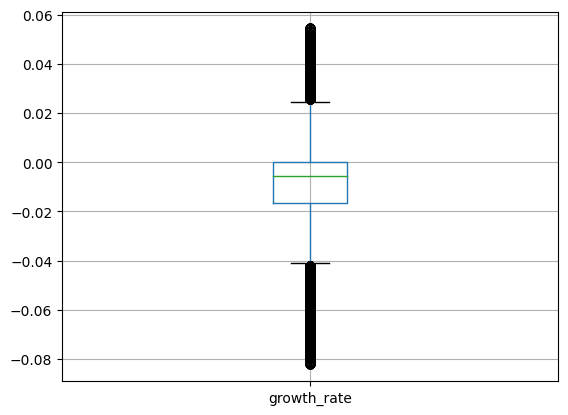

In [ ]:
df_no_outliers.boxplot(column='growth_rate')

In [ ]:
df_no_outliers.describe()['growth_rate']

count    51638.000000
mean        -0.009060
std          0.020159
min         -0.082222
25%         -0.016667
50%         -0.005556
75%          0.000000
max          0.054444
Name: growth_rate, dtype: float64

<Axes: >

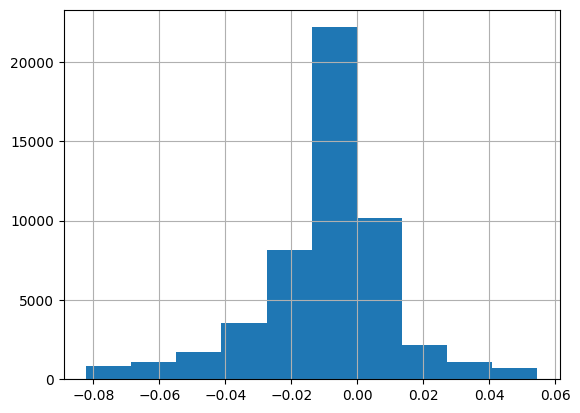

In [ ]:
df_no_outliers['growth_rate'].hist()

# 不過濾

<Axes: >

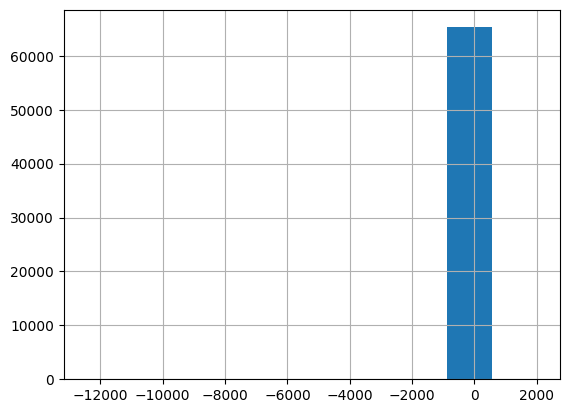

In [ ]:
df_1['growth_rate'].hist()

In [ ]:
quantiles = df_1['growth_rate'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).tolist()
quantiles

[-12459.37888888889,
 -0.04,
 -0.0122222222222222,
 -0.0033333333333333,
 0.0033333333333333,
 2011.9122222222225]

In [ ]:
df_1.describe()['growth_rate']

count    65333.000000
mean        -1.261779
std         75.626636
min     -12459.378889
25%         -0.027778
50%         -0.006667
75%          0.000000
max       2011.912222
Name: growth_rate, dtype: float64

In [ ]:
quantiles = [-12460,
 -0.04,
 -0.0122222222222222,
 -0.0033333333333333,
 0.0033333333333333,
 2011.9122222222225]

# 貼標籤（分級）

In [ ]:
df_1['Grade'] = pd.cut(df_1['growth_rate'], bins= quantiles , labels=['E', 'D', 'C', 'B', 'A'])
df_1

,appid,first_week_players,two_weeks_players,first_month_players,growth_rate,first_week_0,first_week_1,two_weeks_0,two_weeks_1,first_month_0,first_month_1,Grade
0,7,26.000000,25.500000,25.066667,0.357778,0.0,0.0,0.0,0.0,0.0,0.0,A
1,8,1.000000,1.071429,1.366667,-0.003333,0.0,0.0,0.0,0.0,0.0,0.0,C
2,10,3316.857143,1658.428571,2098.900000,-69.963333,0.0,0.0,0.0,0.0,0.0,0.0,E
3,20,37.285714,18.642857,52.666667,-1.755556,0.0,0.0,0.0,0.0,0.0,0.0,E
4,30,221.142857,110.571429,192.400000,-6.413333,0.0,0.0,0.0,0.0,0.0,0.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...
65328,1705670,0.142857,0.357143,0.566667,-0.016667,0.0,0.0,0.0,0.0,0.0,0.0,D
65329,1706320,0.428571,0.357143,0.266667,-0.007778,0.0,0.0,0.0,0.0,0.0,0.0,C
65330,1706530,0.285714,0.142857,0.066667,-0.002222,0.0,0.0,0.0,0.0,0.0,0.0,B
65331,1706860,8.571429,7.357143,6.233333,-0.151111,0.0,0.0,0.0,0.0,0.0,0.0,E


In [ ]:
df_1[df_1.isnull().any(axis=1)]

In [ ]:
df_1['Grade'].value_counts()

D    13675
B    13228
E    13141
C    13007
A    12282
Name: Grade, dtype: int64

# 直接訓練

In [ ]:
# 假设 X 是特征，y 是 'growth_rate_level' 列
X = df_1.drop(['Grade','growth_rate','appid'], axis=1)
y = df_1['Grade']

# 切分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# 创建随机森林模型
model = RandomForestClassifier()

# 拟合模型
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 计算准确度
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.6044233565470268


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.41      0.27      0.33      2407
           B       0.65      0.65      0.65      2710
           C       0.50      0.57      0.53      2562
           D       0.57      0.60      0.59      2803
           E       0.78      0.85      0.81      2585

    accuracy                           0.60     13067
   macro avg       0.58      0.59      0.58     13067
weighted avg       0.58      0.60      0.59     13067



# 特徵工程

In [ ]:
df_1['new_1']=-df_1['first_week_players']
df_1['new_2']=-df_1['two_weeks_players']
df_1['new_3']=-df_1['first_month_players']
df_1['new_4']=-np.abs(df_1['two_weeks_players']-df_1['first_week_players'])
df_1['new_5']=(df_1['first_month_0']+df_1['first_month_1'])/30
df_1['new_6']=df_1['new_4']*(df_1['new_5']+1)

In [ ]:
df_1.corr()['growth_rate']

<ipython-input-50-f67cde1ecf00>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_1.corr()['growth_rate']


appid                 -0.009255
first_week_players    -0.790977
two_weeks_players     -0.911302
first_month_players   -0.783626
growth_rate            1.000000
first_week_0          -0.272293
first_week_1          -0.413978
two_weeks_0           -0.241195
two_weeks_1           -0.449565
first_month_0         -0.246496
first_month_1         -0.444362
new_1                  0.790977
new_2                  0.911302
new_3                  0.783626
new_4                  0.805379
new_5                 -0.463389
new_6                  0.823039
Name: growth_rate, dtype: float64

In [ ]:
# 假设 X 是特征，y 是 'growth_rate_level' 列
X = df_1.drop(['Grade','growth_rate','appid'], axis=1)
y = df_1['Grade']

# 再次訓練

In [ ]:
X = df_1[['new_1','new_2','new_3','new_4','new_5','new_6']]
y = df_1['Grade']

# 切分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class_weights = {'A': 1, 'B': 1, 'C': 1, 'D': 1, 'E': 1}


# 创建随机森林模型
model = RandomForestClassifier(class_weight=class_weights, random_state=87)

# 拟合模型
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 计算准确度
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.5950103313690978


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.45      0.29      0.35      2478
           B       0.65      0.64      0.65      2686
           C       0.51      0.58      0.54      2571
           D       0.57      0.63      0.60      2724
           E       0.78      0.86      0.82      2608

    accuracy                           0.60     13067
   macro avg       0.59      0.60      0.59     13067
weighted avg       0.59      0.60      0.59     13067



# 調配權重＋網格式搜索

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# 假设 X 是特征，y 是 'growth_rate_level' 列
X = df_1[['new_1','new_2','new_3','new_4','new_5','new_6']]
X = StandardScaler().fit_transform(X)
y = df_1['Grade']

# 切分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

class_weights = {'A': 3, 'B': 1, 'C': 2, 'D': 1, 'E': 1}


# 创建随机森林模型
model = RandomForestClassifier(class_weight=class_weights, random_state=42)

# 定义超参数网格
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 使用GridSearchCV进行超参数调整
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')

# 拟合模型
grid_search.fit(X_train, y_train)

# 预测
y_pred = grid_search.predict(X_test)

# 计算准确度
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.6031988979872962


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.39      0.55      0.46      2478
           B       0.84      0.42      0.56      2686
           C       0.50      0.65      0.57      2571
           D       0.67      0.54      0.60      2724
           E       0.82      0.86      0.84      2608

    accuracy                           0.60     13067
   macro avg       0.65      0.60      0.61     13067
weighted avg       0.65      0.60      0.61     13067



In [ ]:
import joblib
# Save the model
joblib.dump(grid_search, 'random_forest_model_1.pkl')

['random_forest_model_1.pkl']